In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/rakeshrau/social-network-ads")

Skipping, found downloaded files in "./social-network-ads" (use force=True to force download)


In [ ]:
df=pd.read_csv("/content/social-network-ads/Social_Network_Ads.csv")
print(len(df))

400


In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


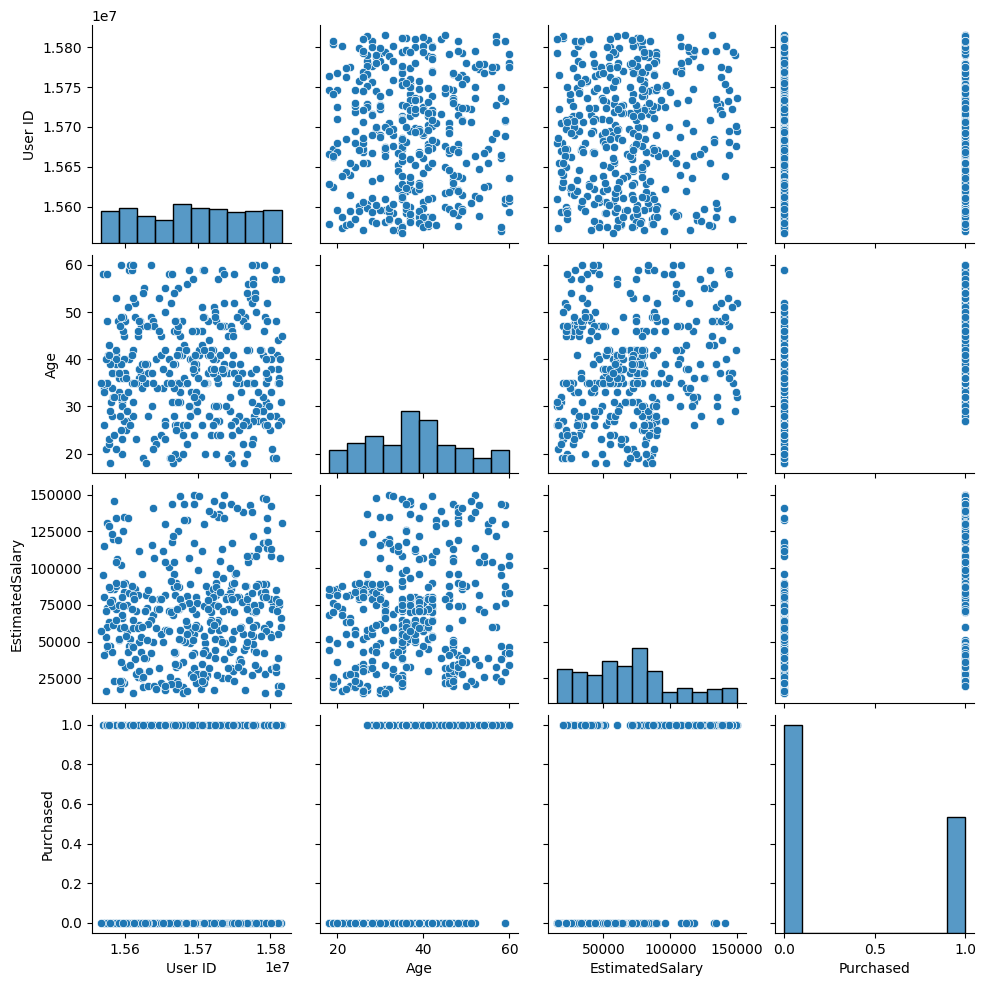

In [ ]:
sns.pairplot(df)

In [ ]:
df.drop(columns=['User ID'],inplace=True)

## Converting categorical column to numerical

In [ ]:
df['Gender']=list(map(lambda x:1 if x=='Male' else 0,df['Gender']))

<Axes: ylabel='count'>

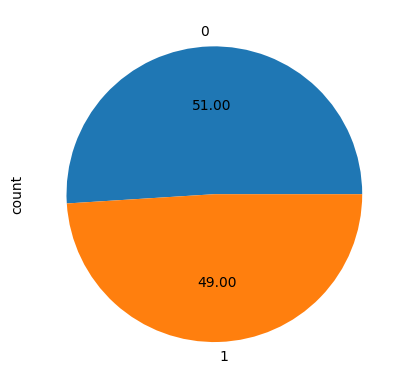

In [ ]:
df['Gender'].value_counts().plot(kind="pie",autopct='%.2f')

## We can say that data is not scattered

In [ ]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


<Axes: >

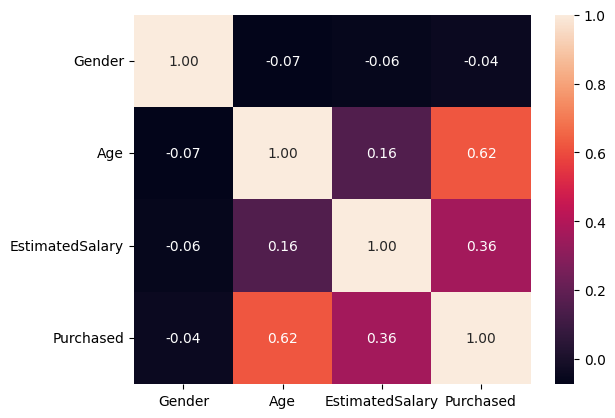

In [ ]:
corr=df.corr()
sns.heatmap(corr,annot=True,fmt='.2f')

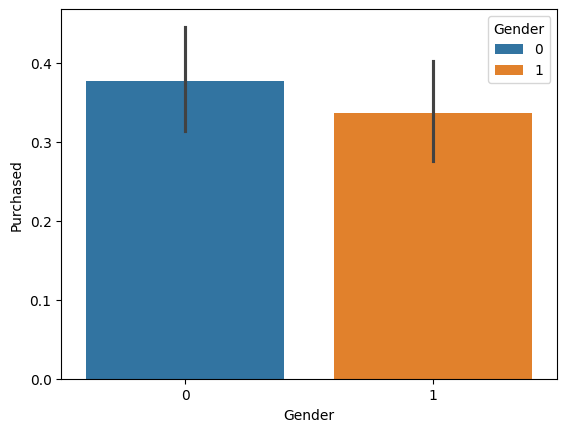

In [ ]:
sns.barplot(x=df['Gender'], y=df['Purchased'],hue=df['Gender'])   # purchased bhi 0/1 me hi aa raha hai
plt.show()
# barplot me y-axis me mean aata hai average aata hai

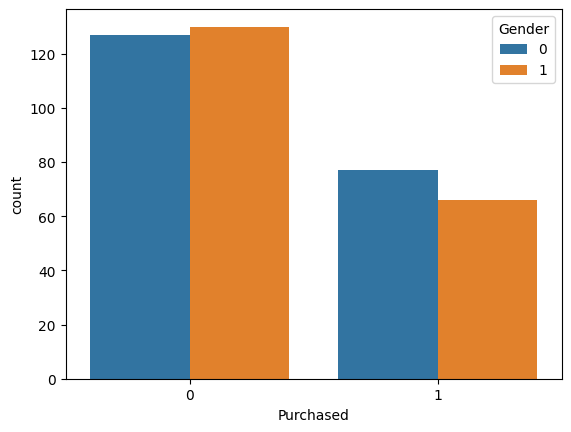

In [ ]:
sns.countplot(x=df['Purchased'],hue=df['Gender'])
plt.show()

<Axes: ylabel='Density'>

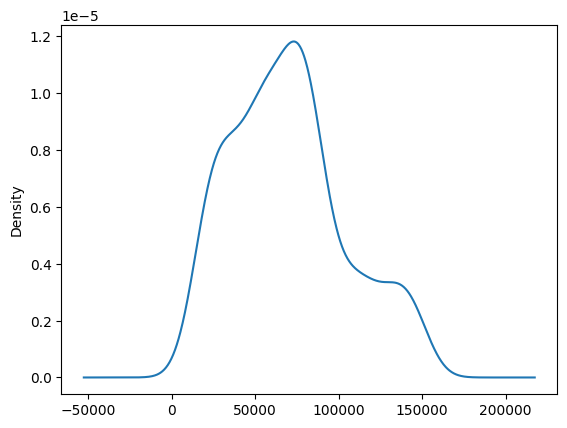

In [ ]:
df['EstimatedSalary'].plot(kind="kde")

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

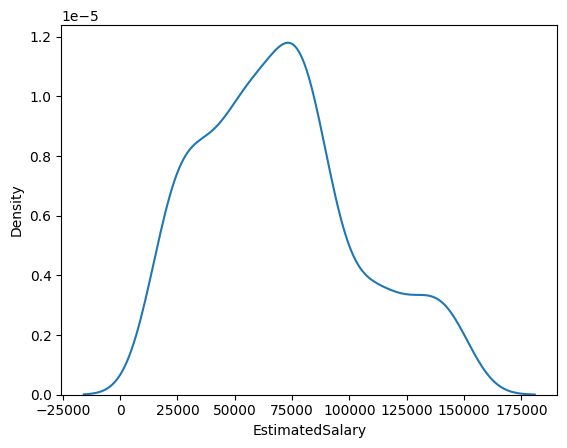

In [ ]:
sns.kdeplot(df['EstimatedSalary'])

## Distribution of Estimated Salary is kind of normal

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
X=df[['Gender','Age','EstimatedSalary']]
y=df['Purchased']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
logistic=LogisticRegression()

In [ ]:
logistic.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred=logistic.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
score=accuracy_score(y_pred,y_test)
print(logistic.score(X_test,y_test))
print(score,'\n')
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.89
0.89 

              precision    recall  f1-score   support

           0       0.97      0.87      0.92        70
           1       0.76      0.93      0.84        30

    accuracy                           0.89       100
   macro avg       0.86      0.90      0.88       100
weighted avg       0.90      0.89      0.89       100

[[61  9]
 [ 2 28]]


## as we can see that the precision of 0 class means predicting zeroes is coming 1 means 100% but in case of 1 class it is coming 0 means while predicting 1 also it is giving me zero only which shows that model in not properly trained in predicting class 1 value means dataset can be imbalanced

In [ ]:
df['Purchased'].value_counts()

,count
Purchased,
0,257
1,143


<Axes: ylabel='Density'>

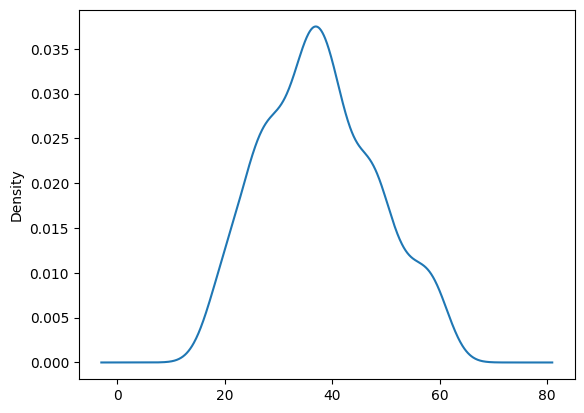

In [ ]:
df['Age'].plot(kind="kde")

In [ ]:
# maximum datapoints are clustered near 40
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


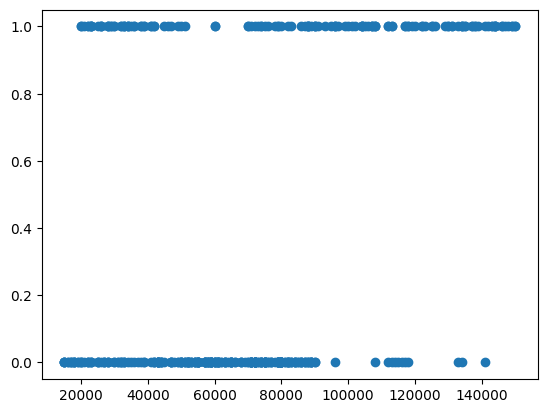

In [ ]:
plt.scatter(df['EstimatedSalary'],y=df['Purchased'])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic=LogisticRegression()
logistic.fit(X_train,y_train)
y_pred=logistic.predict(X_test)
print(y_pred)

[0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0]


In [ ]:
logistic.score(X_train,y_train)

0.8333333333333334

In [ ]:
print(accuracy_score(y_test,y_pred))

0.88


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        63
           1       0.93      0.73      0.82        37

    accuracy                           0.88       100
   macro avg       0.90      0.85      0.86       100
weighted avg       0.89      0.88      0.88       100



In [ ]:
print(confusion_matrix(y_test,y_pred))

[[61  2]
 [10 27]]


In [ ]:

# without hyperparameter tuning
print(logistic.score(X_train,y_train))
print(logistic.score(X_test,y_test))

0.8333333333333334
0.88


In [ ]:
new_logistic=LogisticRegression(penalty='l1',C=0.1,fit_intercept=False,class_weight='balanced',random_state=42,max_iter=500,solver='liblinear')
new_logistic.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight='balanced', fit_intercept=False,
                   max_iter=500, penalty='l1', random_state=42,
                   solver='liblinear')

In [ ]:
y_pred=new_logistic.predict(X_test)

In [ ]:
print(new_logistic.score(X_train,y_train))
print(new_logistic.score(X_test,y_test))

0.7933333333333333
0.84


In [ ]:
print(accuracy_score(y_test,y_pred))

0.84


## now hyperparameter tuning

In [ ]:
hyperlogistic=LogisticRegression()
penalty=['l1', 'l2', 'elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]
params=dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weight)

In [ ]:
## cross validaation karvane ke liye use Stratified K fold
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()

In [ ]:
from sklearn.model_selection import GridSearchCV

grid=GridSearchCV(estimator=hyperlogistic,param_grid=params,scoring='accuracy',cv=cv)
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [ ]:
print(grid.best_params_)

{'C': 0.01, 'class_weight': {0: 50, 1: 100}, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
print(grid.predict_proba(X_test))
y_pred=grid.predict(X_test)
print(y_pred)

[[0.59721479 0.40278521]
 [0.01197757 0.98802243]
 [0.96340744 0.03659256]
 [0.0777571  0.9222429 ]
 [0.97348752 0.02651248]
 [0.906336   0.093664  ]
 [0.06665556 0.93334444]
 [0.85451198 0.14548802]
 [0.42345586 0.57654414]
 [0.40698115 0.59301885]
 [0.76259797 0.23740203]
 [0.19625552 0.80374448]
 [0.98432798 0.01567202]
 [0.99622223 0.00377777]
 [0.78532993 0.21467007]
 [0.39997848 0.60002152]
 [0.20708095 0.79291905]
 [0.20767675 0.79232325]
 [0.72941302 0.27058698]
 [0.04664012 0.95335988]
 [0.99357071 0.00642929]
 [0.84951737 0.15048263]
 [0.50510255 0.49489745]
 [0.01776189 0.98223811]
 [0.99688713 0.00311287]
 [0.31393485 0.68606515]
 [0.29394036 0.70605964]
 [0.73617444 0.26382556]
 [0.00781808 0.99218192]
 [0.99710547 0.00289453]
 [0.44046206 0.55953794]
 [0.98320206 0.01679794]
 [0.14114933 0.85885067]
 [0.87704011 0.12295989]
 [0.20181675 0.79818325]
 [0.66688834 0.33311166]
 [0.7230278  0.2769722 ]
 [0.63768431 0.36231569]
 [0.98199048 0.01800952]
 [0.98875302 0.01124698]


In [ ]:
print(grid.score(X_train,y_train))
print(grid.score(X_test,y_test))

0.8333333333333334
0.86


In [ ]:
print(accuracy_score(y_test,y_pred))

0.86


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        63
           1       0.78      0.86      0.82        37

    accuracy                           0.86       100
   macro avg       0.85      0.86      0.85       100
weighted avg       0.87      0.86      0.86       100



## implementing roc_aoc score and curve

In [ ]:

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [ ]:
auc_score=roc_auc_score(y_test,y_pred)
print(auc_score)

0.8610038610038611


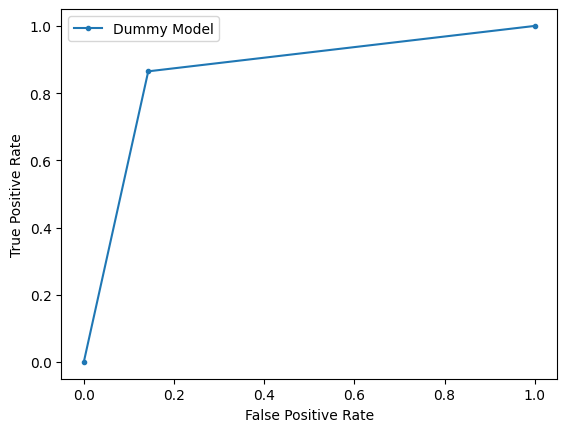

[inf  1.  0.]


In [ ]:
fpr,tpr, thresholds = roc_curve(y_test, y_pred)  # that _ is for threshold which is ignored
pyplot.plot(fpr,tpr, marker='.', label='Dummy Model')


pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
print(thresholds)

In [ ]:
import streamlit as slt

In [ ]:
import pickle
# Save Model
with open("logistic_model.pkl", "wb") as f:
    pickle.dump(grid, f)

print("Model saved successfully!")


Model saved successfully!


In [ ]:
%%writefile app.py
import streamlit as st
import pickle
import numpy as np

# Load the trained model
def load_model():
    with open("logistic_model.pkl", "rb") as f:
        model = pickle.load(f)
    return model

# Load model
model = load_model()

# Streamlit UI
st.title("Purchase Prediction App")
st.write("Enter details to predict whether the user will purchase or not.")

# User inputs
gender = st.selectbox("Gender", ["Male", "Female"])
age = st.number_input("Age", min_value=18, max_value=100, step=1)
estimated_salary = st.number_input("Estimated Salary", min_value=1000, max_value=200000, step=500)

# Convert gender to numeric format
gender = 1 if gender == "Male" else 0

# Predict button
if st.button("Predict"):
    input_data = np.array([[gender, age, estimated_salary]])
    prediction = model.predict(input_data)
    result = "Purchased" if prediction[0] == 1 else "Not Purchased"
    st.write(f"Prediction: {result}")



In [ ]:
! wget -q -O - ipv4.icanhazip.com

34.141.249.143


In [ ]:
! wget -q -O - ipv4.icanhazip.com

34.141.249.143


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501



⠙⠹
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.141.249.143:8501

⠸⠼⠴your url is: https://slimy-signs-battle.loca.lt
